<a href="https://colab.research.google.com/github/freevejarano/Misioneros-CanibalesBFS/blob/main/Misioneros_y_Can%C3%ADbales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b>Inteligencia Artificial </b>
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> Inteligencia Artificial
<br>
<i><b>TEMA:</b></i> Implementación BFS y DFS 
<br>
<i><b>Autor:</b></i> Luis Alejandro Vejarano Gutierrez
<br>
05/03/21
<br>
</FONT>
</div>

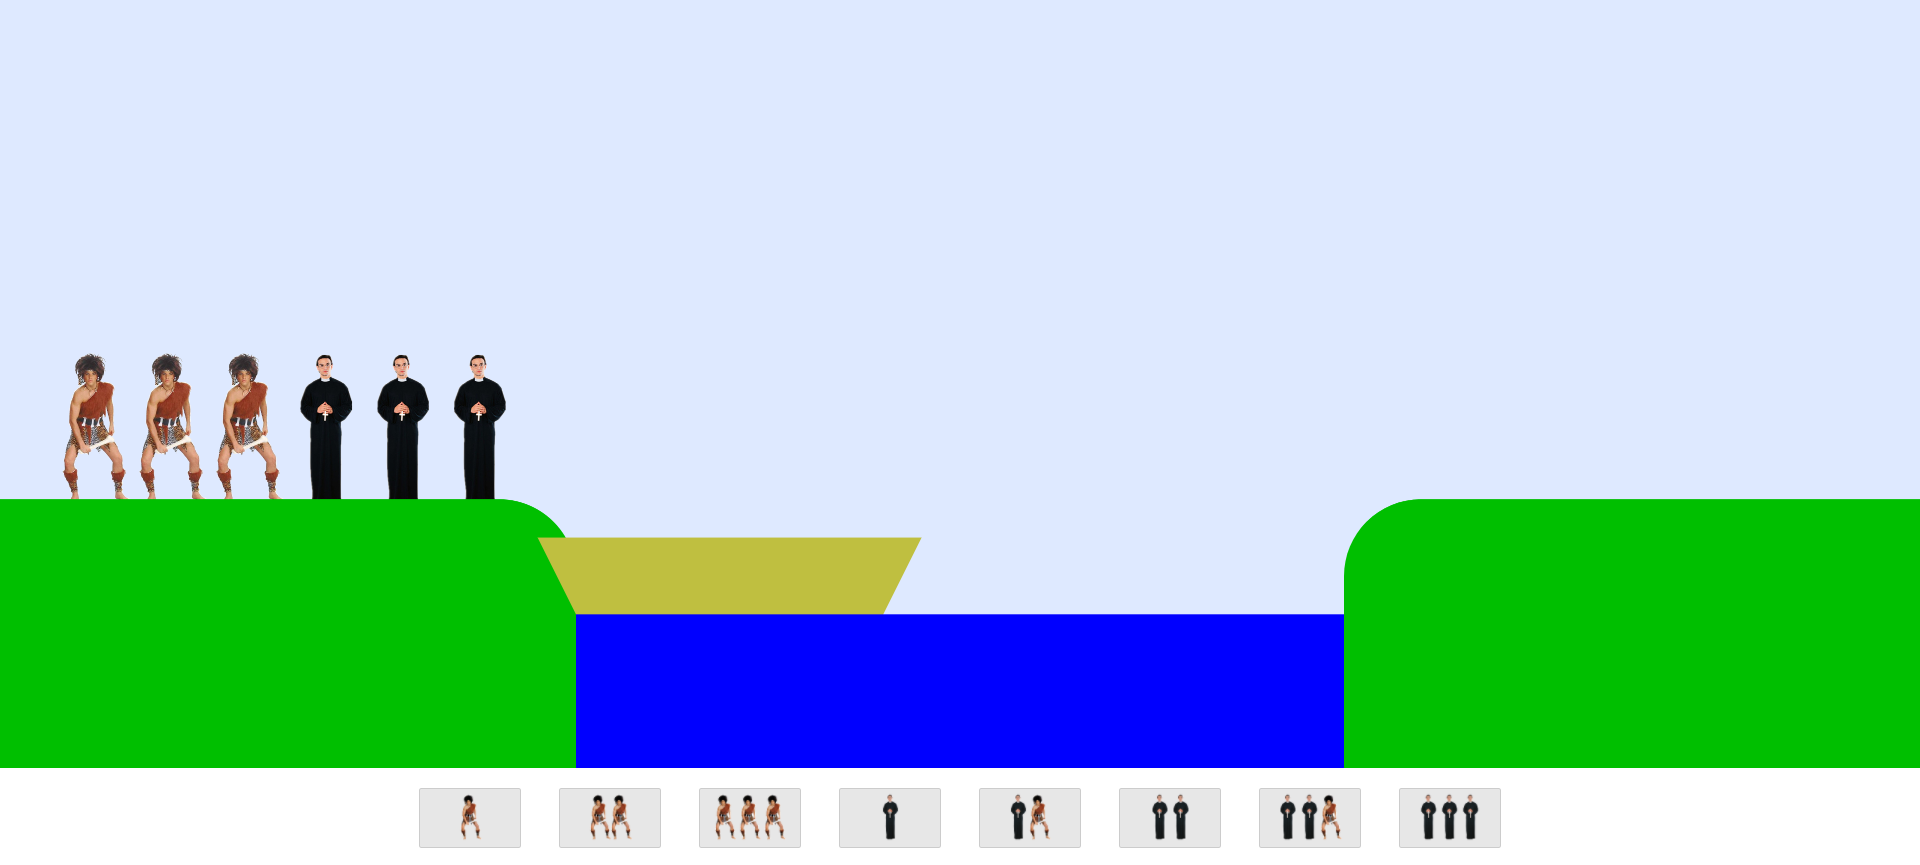

Reglas del juego:

• Los misioneros y los caníbales deben cruzar el rio a salvo.

• Los barcos pueden viajar de a 3 o 2 personas.

• Si el número de caníbales es mayor al número de misioneros en cualquier lugar, los misioneros serán devorados.

In [13]:
import copy # La biblioteca permite crear una copia de una lista
import time # Permite usar la función sleep para la impresión

# La clase representa un lugar en tierra
class Tierra:
  def __init__(self, canibal, misionero):
    self.canibal = canibal
    self.misionero = misionero

  # Imprime el valor del objeto
  def __str__(self):
    return str(self.canibal) + "canibal(es) "+ str(self.misionero) +"misionero(s)"
  
  # La función verificará que sea posible realizar el viaje
  # Según las reglas del juego
  def validar(self):
      if self.misionero in [0,1,2,3] and self.canibal in [0,1,2,3]:
        return (self.misionero >= self.canibal or self.misionero == 0)
      else:
        return False

  # Verifica que si todos hayan cruzado el río a salvo
  def meta(self):
      return self.misionero == 3 and self.canibal == 3
  

In [14]:
# La clase Nodo3 permite tener cada estado del juego con 3 personas por bote
class Nodo3:
  def __init__(self, valor):
    self.valor = valor
    self.padre = None
  
  # Imprime el valor del objeto
  def __str__(self):
    return str(self.valor["izq"]) + " " + str(self.valor["der"]) + " " + str(self.valor["bote"])

  # La función árbol va a construir
  def arbol(self):
     # La lista almacenará cada nodo
     hijos = []
     # tierraA representa el lugar donde está el bote
     tierraA = ""
     # tierraB representa el lugar a donde va el bote
     tierraB = ""
     # aux almacena una copia reutlizable sin afectar el valor del nodo
     aux = copy.deepcopy(self.valor)
     # Se inicializa los valores de cada tierra dependiendo la posición del bote
     if self.valor["bote"] == "izq":
       tierraA = "izq"
       tierraB = "der"
     elif self.valor["bote"] == "der":
       tierraA = "der"
       tierraB = "izq"
     
     # MOVIMIENTOS POSIBLES
     #  Se actualiza el estado de cada tierra y se valida el movimiento
     #  Si es posible se adjunta el nodo a la lista

     # 3 Canibales
     if aux[tierraA].canibal >= 3:
       aux[tierraA].canibal -= 3
       aux[tierraB].canibal += 3
       aux["bote"] = tierraB
       if aux[tierraA].validar() and aux[tierraB].validar():
           hijo = Nodo(aux)
           hijo.padre = self
           hijos.append(hijo)

     aux = copy.deepcopy(self.valor)

     # 3 Misioneros
     if aux[tierraA].misionero >= 3:
       aux[tierraA].misionero -= 3
       aux[tierraB].misionero += 3
       aux["bote"] = tierraB
       if aux[tierraA].validar() and aux[tierraB].validar():
          hijo = Nodo3(aux)
          hijo.padre = self
          hijos.append(hijo)

     aux = copy.deepcopy(self.valor)

     # 2 Canibales
     if aux[tierraA].canibal >= 2:
       aux[tierraA].canibal -= 2
       aux[tierraB].canibal += 2
       aux["bote"] = tierraB
       if aux[tierraA].validar() and aux[tierraB].validar():
           hijo = Nodo3(aux)
           hijo.padre = self
           hijos.append(hijo)

     aux = copy.deepcopy(self.valor)

     # 2 Misioneros
     if aux[tierraA].misionero >= 2:
       aux[tierraA].misionero -= 2
       aux[tierraB].misionero += 2
       aux["bote"] = tierraB
       if aux[tierraA].validar() and aux[tierraB].validar():
          hijo = Nodo3(aux)
          hijo.padre = self
          hijos.append(hijo)

     aux = copy.deepcopy(self.valor)

     # 2 Misioneros y 1 Canibal
     if aux[tierraA].misionero >= 2 and aux[tierraA].canibal >= 1:
         aux[tierraA].misionero -= 2
         aux[tierraB].misionero += 2
         aux[tierraA].canibal -= 1
         aux[tierraB].canibal += 1
         aux["bote"] = tierraB
         if aux[tierraA].validar() and aux[tierraB].validar():
            hijo = Nodo3(aux)
            hijo.padre = self
            hijos.append(hijo)

     aux = copy.deepcopy(self.valor)

     # 1 Canibal
     if aux[tierraA].canibal >= 1:
        aux[tierraA].canibal -= 1
        aux[tierraB].canibal += 1
        aux["bote"] = tierraB
        if aux[tierraA].validar() and aux[tierraB].validar():
           hijo = Nodo3(aux)
           hijo.padre = self
           hijos.append(hijo)

     aux = copy.deepcopy(self.valor)

     # 1 Misionero
     if aux[tierraA].misionero >= 1:
        aux[tierraA].misionero -= 1
        aux[tierraB].misionero += 1
        aux["bote"] = tierraB
        if aux[tierraA].validar() and aux[tierraB].validar():
           hijo = Nodo3(aux)
           hijo.padre = self
           hijos.append(hijo)

     aux = copy.deepcopy(self.valor)

     # 1 Misionero y 1 Canibal
     if aux[tierraA].misionero >= 1 and aux[tierraA].canibal >= 1:
         aux[tierraA].misionero -= 1
         aux[tierraB].misionero += 1
         aux[tierraA].canibal -= 1
         aux[tierraB].canibal += 1
         aux["bote"] = tierraB
         if aux[tierraA].validar() and aux[tierraB].validar():
            hijo = Nodo3(aux)
            hijo.padre = self
            hijos.append(hijo)

     return hijos


In [15]:
# La clase Nodo2 permite tener cada estado del juego con 2 personas por bote
class Nodo2:
  def __init__(self, valor):
    self.valor = valor
    self.padre = None
  
  # Imprime el valor del objeto
  def __str__(self):
    return str(self.valor["izq"]) + " " + str(self.valor["der"]) + " " + str(self.valor["bote"])

  # La función árbol va a construir
  def arbol(self):
     # La lista almacenará cada nodo
     hijos = []
     # tierraA representa el lugar donde está el bote
     tierraA = ""
     # tierraB representa el lugar a donde va el bote
     tierraB = ""
     # aux almacena una copia reutlizable sin afectar el valor del nodo
     aux = copy.deepcopy(self.valor)
     # Se inicializa los valores de cada tierra dependiendo la posición del bote
     if self.valor["bote"] == "izq":
       tierraA = "izq"
       tierraB = "der"
     elif self.valor["bote"] == "der":
       tierraA = "der"
       tierraB = "izq"
     
     # MOVIMIENTOS POSIBLES
     #  Se actualiza el estado de cada tierra y se valida el movimiento
     #  Si es posible se adjunta el nodo a la lista
     # 2 Canibales
     if aux[tierraA].canibal >= 2:
       aux[tierraA].canibal -= 2
       aux[tierraB].canibal += 2
       aux["bote"] = tierraB
       if aux[tierraA].validar() and aux[tierraB].validar():
           hijo = Nodo2(aux)
           hijo.padre = self
           hijos.append(hijo)

     aux = copy.deepcopy(self.valor)
     # 2 Misioneros
     if aux[tierraA].misionero >= 2:
       aux[tierraA].misionero -= 2
       aux[tierraB].misionero += 2
       aux["bote"] = tierraB
       if aux[tierraA].validar() and aux[tierraB].validar():
          hijo = Nodo2(aux)
          hijo.padre = self
          hijos.append(hijo)

     aux = copy.deepcopy(self.valor)
     # 1 Canibal
     if aux[tierraA].canibal >= 1:
        aux[tierraA].canibal -= 1
        aux[tierraB].canibal += 1
        aux["bote"] = tierraB
        if aux[tierraA].validar() and aux[tierraB].validar():
           hijo = Nodo2(aux)
           hijo.padre = self
           hijos.append(hijo)

     aux = copy.deepcopy(self.valor)
     # 1 Misionero
     if aux[tierraA].misionero >= 1:
        aux[tierraA].misionero -= 1
        aux[tierraB].misionero += 1
        aux["bote"] = tierraB
        if aux[tierraA].validar() and aux[tierraB].validar():
           hijo = Nodo2(aux)
           hijo.padre = self
           hijos.append(hijo)

     aux = copy.deepcopy(self.valor)
     # 1 Misionero y 1 Canibal
     if aux[tierraA].misionero >= 1 and aux[tierraA].canibal >= 1:
         aux[tierraA].misionero -= 1
         aux[tierraB].misionero += 1
         aux[tierraA].canibal -= 1
         aux[tierraB].canibal += 1
         aux["bote"] = tierraB
         if aux[tierraA].validar() and aux[tierraB].validar():
            hijo = Nodo2(aux)
            hijo.padre = self
            hijos.append(hijo)

     return hijos


In [42]:
# Función que cumple con el algoritmo Breadth First Search
def BFS_MisionerosyCanibales(xBote):
  # Inicializa el juego
  izq = Tierra(3, 3)
  der = Tierra(0, 0)
  raiz = {"izq": izq, "der": der, "bote": "izq"}
  visitados = []

  # Crea el primer nodo dependiendo del máximo de personas por bote
  if xBote == 3:
    nodos = [Nodo3(raiz)]
  elif xBote == 2:
    nodos = [Nodo2(raiz)]
  
  # Recorre todos los nodos hasta cumplir con el objetivo
  while len(nodos) > 0:
    estado = nodos.pop(0)
    visitados.append(estado)
    if estado.valor["der"].meta():
      return estado
    else:
      hijos = estado.arbol()
      for x in hijos:
        if (x not in visitados):
          nodos.append(x)
  return None

# Función que imprime cada paso de la solución del problema
def impresionMisionerosyCanibales(solucion):
  ruta = [solucion]
  while solucion.padre:
    solucion = solucion.padre
    ruta.append(solucion)
  i = 0
  for x in reversed(ruta):
    msg = "Paso " + str(i) + "  "
    msg += "🦷" * x.valor["izq"].canibal + ""
    msg += "👨‍🦲" * x.valor["izq"].misionero + ""
    if x.valor["bote"] == "izq":
      msg += "  🛶\t\t"
    else:
      msg += "\t\t🛶  "
    msg += "🦷" * x.valor["der"].canibal + ""
    msg += "👨‍🦲" * x.valor["der"].misionero
    msg += "\n"
    print(msg)
    time.sleep(1)
    i += 1
  print("\nTodas las personas cruzaron a salvo 🎉")


In [45]:
# EJECUCIÓN DEL PROGRAMA
opcion = 0
# Valida la cantidad de personas por bote
while True:
  opcion = int(input("Ingrese la cantidad de personas en el bote: (3 o 2) "))
  if opcion in [2,3]:
    break
  else:
    print("Error: Cantidad fuera de rango\n")

print("\nSolución por el algoritmo Breadth First Search (BFS)\n")
solucionMyC = BFS_MisionerosyCanibales(opcion)
impresionMisionerosyCanibales(solucionMyC)

Ingrese la cantidad de personas en el bote: (3 o 2) 3

Solución por el algoritmo Breadth First Search (BFS)

Paso 0  🦷🦷🦷👨‍🦲👨‍🦲👨‍🦲  🛶		

Paso 1  👨‍🦲👨‍🦲👨‍🦲		🛶  🦷🦷🦷

Paso 2  🦷🦷👨‍🦲👨‍🦲👨‍🦲  🛶		🦷

Paso 3  🦷🦷		🛶  🦷👨‍🦲👨‍🦲👨‍🦲

Paso 4  🦷🦷🦷  🛶		👨‍🦲👨‍🦲👨‍🦲

Paso 5  		🛶  🦷🦷🦷👨‍🦲👨‍🦲👨‍🦲


Todas las personas cruzaron a salvo 🎉
